Improved Test Accuracy: 0.9834


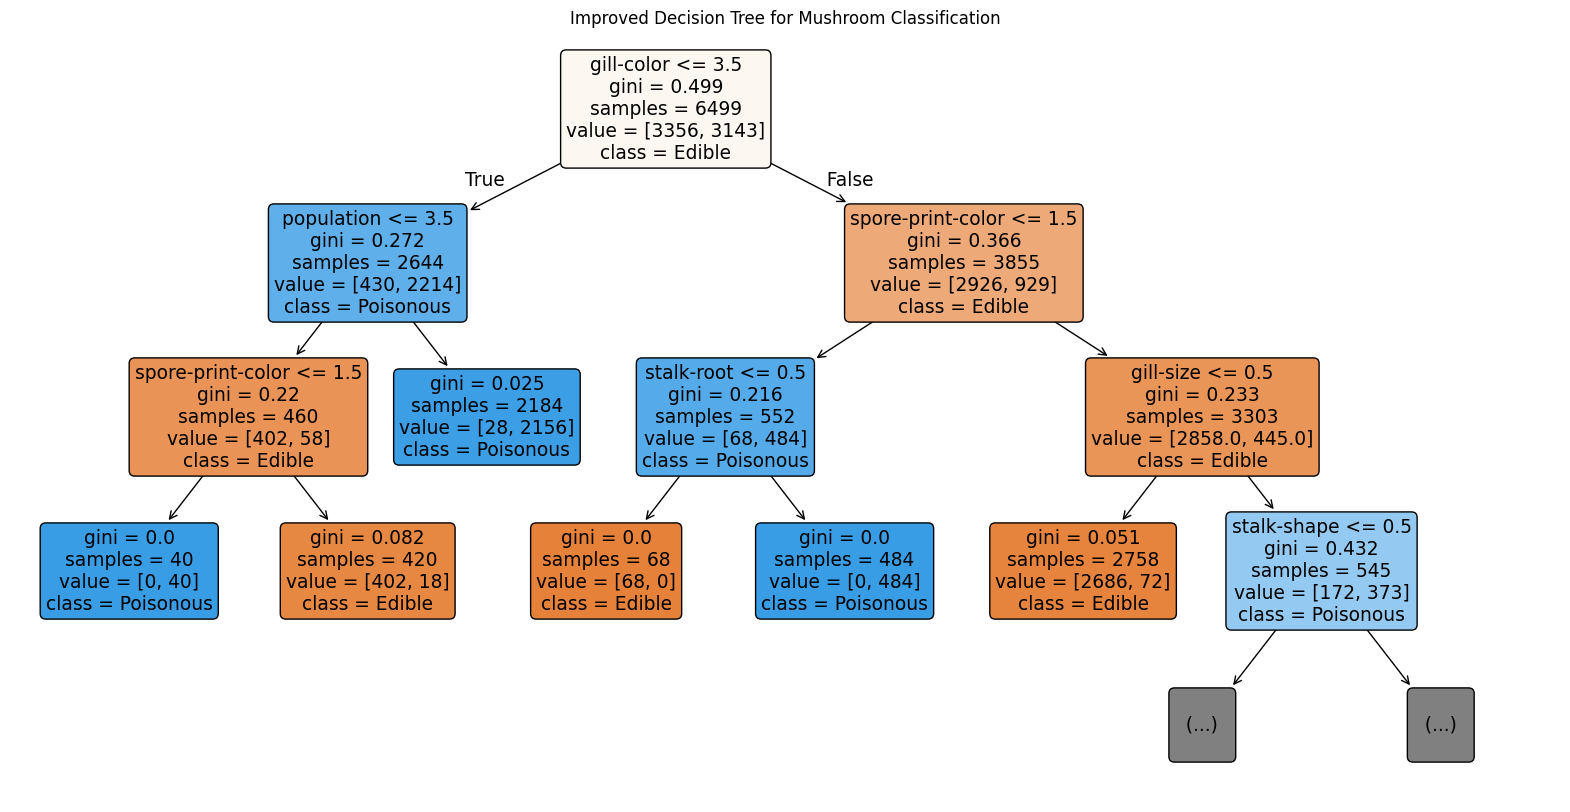

In [13]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('mushrooms.csv')

# Encode categorical columns to numeric
for col in df.columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

# Features and target
X = df.drop('class', axis=1)
y = df['class']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Train improved Decision Tree model with pruning parameters
clf = DecisionTreeClassifier(random_state=0, max_depth=None, min_samples_split=5, min_samples_leaf=2, ccp_alpha=0.01)
clf.fit(X_train, y_train)

# Predict and calculate accuracy
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Improved Test Accuracy: {accuracy:.4f}")

# Plot decision tree limited to max depth=3 for clarity
plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=X.columns, class_names=['Edible', 'Poisonous'], filled=True, rounded=True, max_depth=3)
plt.title('Improved Decision Tree for Mushroom Classification')
plt.show()
